# Άσκηση 5

Αρχικά θα χρησιμοποιήσουμε τις βιβλιοθήκες ggplot2, leaps, corrplot και car οπότε τις εισαγάγουμε.

In [1]:
library(ggplot2)
library(car)
library(leaps)
library(corrplot)

Loading required package: carData

corrplot 0.84 loaded



Δημιουργούμε μία συνάρτηση για να διαβάζουμε τα δεδομένα από τα αντιστοιχα αρχεία

In [2]:
# Function to read Data
read_data <- function(file_path) {
  d <- read.table(file_path, header = TRUE,  sep = " ", dec = ".") 
  return(d)
}

## Ερώτημα Α

Με χρήση της εντολής data(iris) φορτώνουμε τα δεδομένα μας

In [3]:
data(iris)

### Υποερώτημα Ai

Ταξινομούμε τα δεδομένα μας σε αύξουσα σειρά με βάση το Petal.Width και το Petal.Length

In [4]:
# Order By Petal.Width
iris_order_by_petal_width<-iris[order(iris$Petal.Width),]
# Order by Petal.Length
iris_order_by_petal_length<-iris[order(iris$Petal.Length),]

# iris_order_by_sepal_width<-iris[order(iris$Sepal.Width),]
# iris_order_by_sepal_length<-iris[order(iris$Sepal.Length),]

Χρησιμοποιούμε τη βιβλιοθήκη ggplot2 για να δημιουργήσουμε τις φραφικές παραστάσεις των πετάλων των λουλουδιών. 

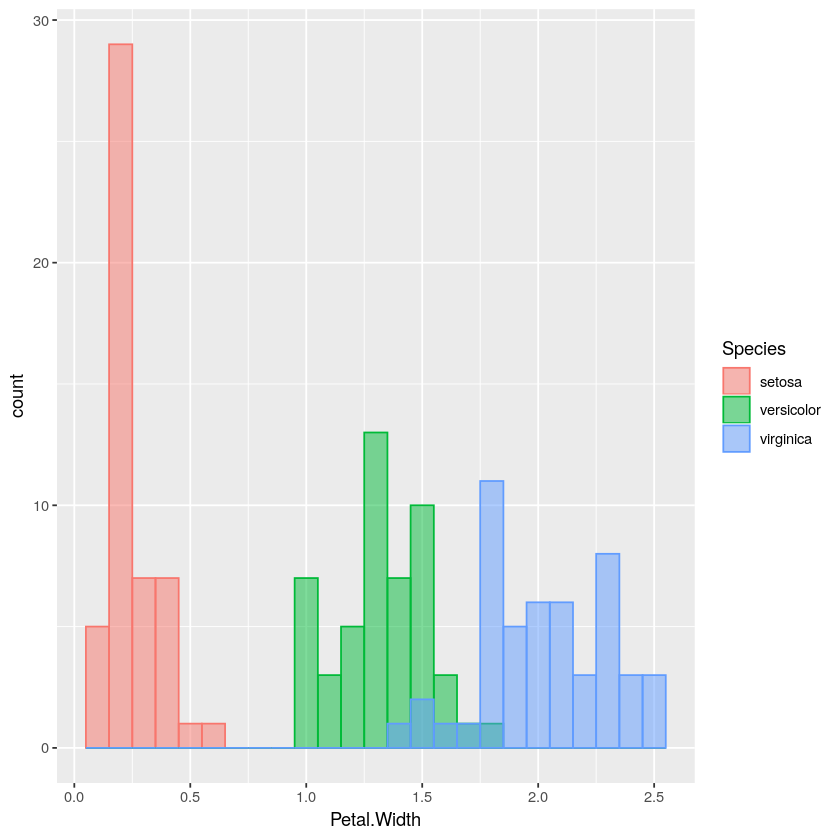

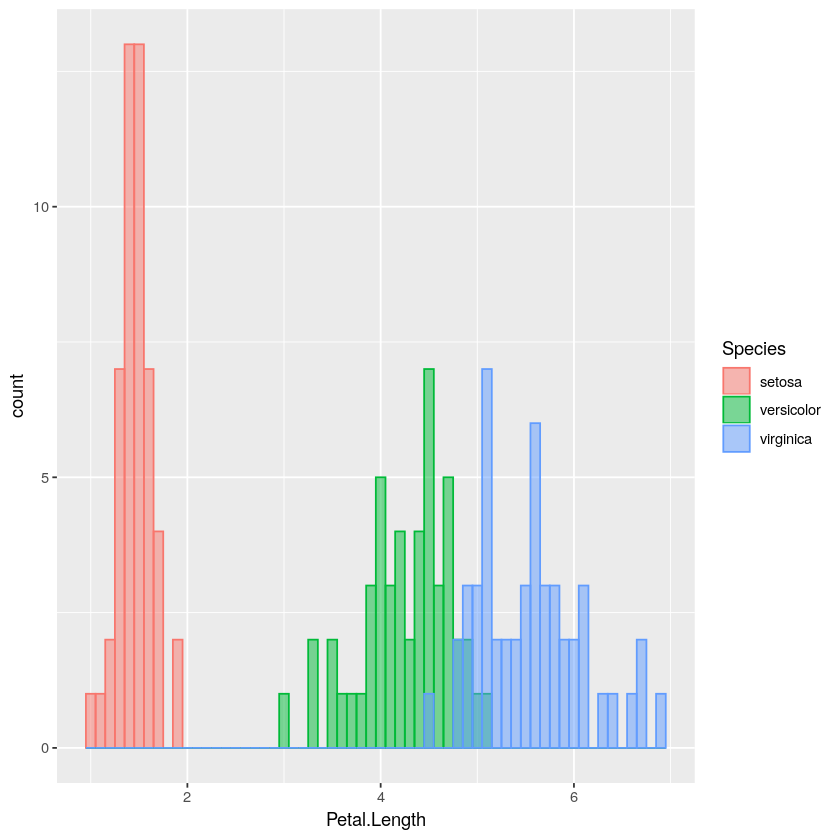

In [5]:
ggplot(iris_order_by_petal_width, aes(x=Petal.Width,fill=Species, color=Species)) + 
geom_histogram(position="identity", alpha=0.5, binwidth = 0.1)


ggplot(iris_order_by_petal_length, aes(x=Petal.Length,fill=Species, color=Species)) + 
geom_histogram(position="identity", alpha=0.5, binwidth = 0.1)

### Υποερώτημα Aii

Χρησιμοποιούμε την εντολή matplot() για να κατασκευάσουμε το διάγραμμα διασποράς του μήκους του κάλυκα του μήκους των λουλουδιών συναρτήσει των υπολοίπων ποσοτικών μεταβλητών.

* Με τον αριθμό 1 και κόκκινο χρώμα απεικονίζεται το Sepal Width
* Με τον αριθμό 2 και πράσινο χρώμα απεικονίζεται το Petal Length
* Με τον αριθμό 3 και γαλάζιο χρώμα απεικονίζεται το Petal Width

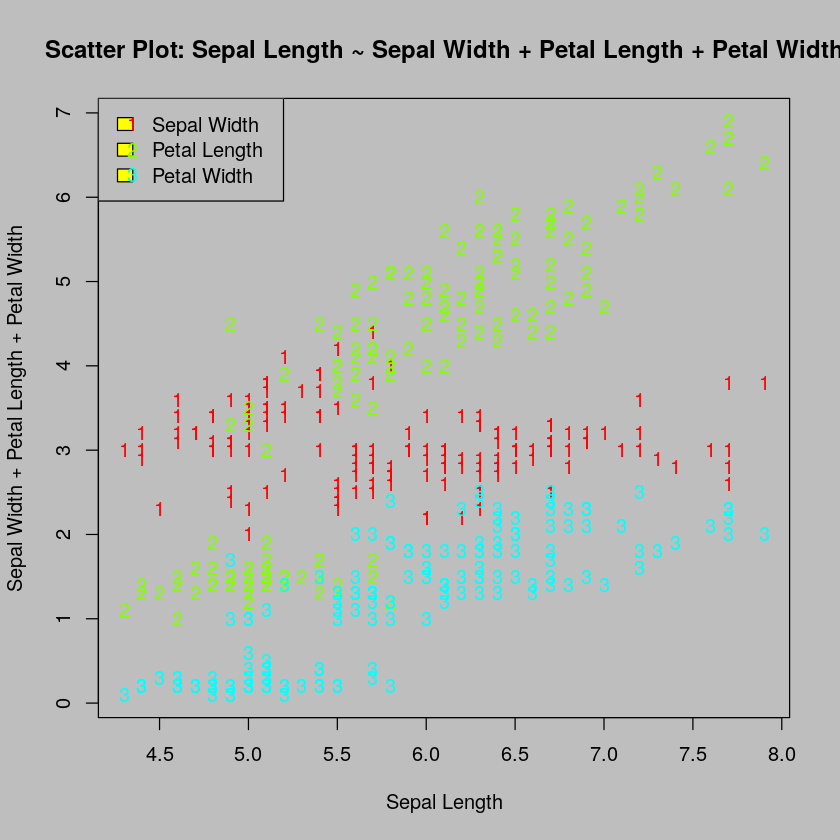

In [6]:
op <- par(bg = "grey")
matplot(iris$Sepal.Length, iris[,-c(1,5)], pch = "123",xlab = "Sepal Length",
        ylab = "Sepal Width + Petal Length + Petal Width",col= rainbow(4),
       main = "Scatter Plot: Sepal Length ~ Sepal Width + Petal Length + Petal Width")
legend("topleft",1, 95, legend =c("Sepal Width", "Petal Length","Petal Width"),pch = "123",
        col = rainbow(4))
par(op)

## Ερώτημα Β

Αρχικά διαβάζουμε τα δεδομένα από το αντίστοιχο αρχείο με χρήση της συνάρτησης read_data().

Έπειτα αφαιρούμε ορισμένες κολώνες οι οποίες δεν αναφαίρονται στην άσκηση.

In [7]:
babies_file_path<- './babies.data.txt'
babies_data <- read_data(babies_file_path) 
babies_data <- babies_data[, -c(3,5,6)]
head(babies_data[])

,birth.weight,gestation,mom.age,mom.smokes
,<int>,<int>,<int>,<int>
1,120,284,27,0
2,113,282,33,0
3,128,279,28,1
4,108,282,23,1
5,136,286,25,0
6,138,244,33,0


Χρησιμοποιούμε την εντολή scatterplotMatrix() του πακέτου car η οποία κάνει τις γραφικές παραστάσεις ανά δύο των μεταβλητών. Επίσης προσθέτει μία ευθεία παλινδρόμησης σε κάθε διάγραμμα.

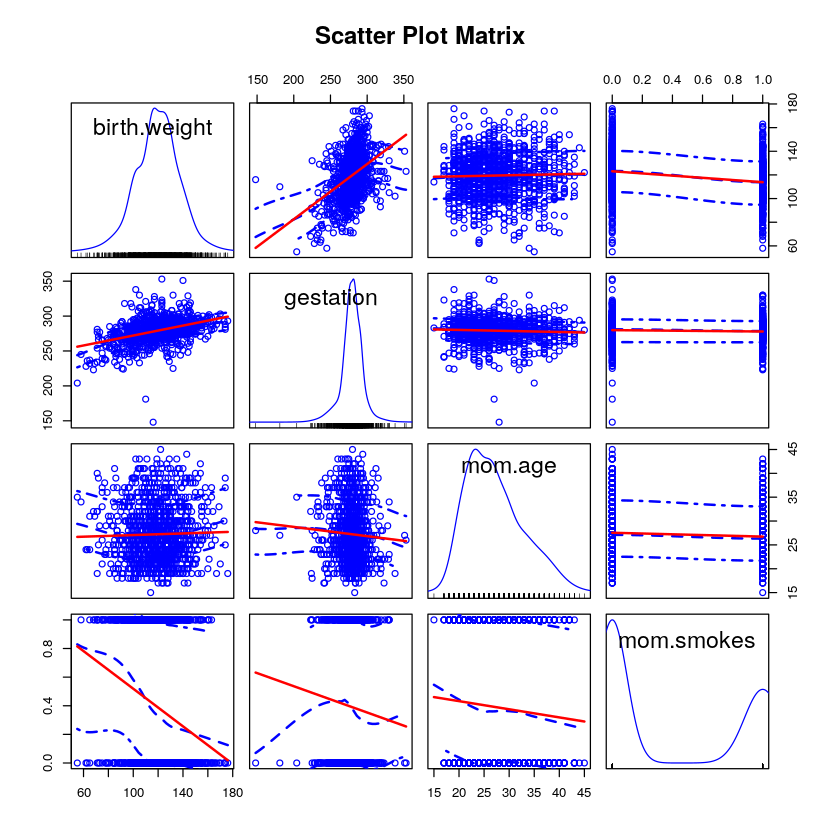

In [8]:
scatterplotMatrix(formula = ~birth.weight+gestation+mom.age+mom.smokes,
                  data = babies_data,main="Scatter Plot Matrix",
                  regLine=list(method=lm, lty=1, lwd=2, col='red'))

Χρησιμοποιούμε την εντολή regsubsets() απο το πακέτο leaps. Από το διάγραμμα που προκύπτει φαίνεται ότι ένα μοντέλο με τα intercept, gestation, mom.age και mom.smokes θα έχει adjusted R-squared περίπου 0.21 .

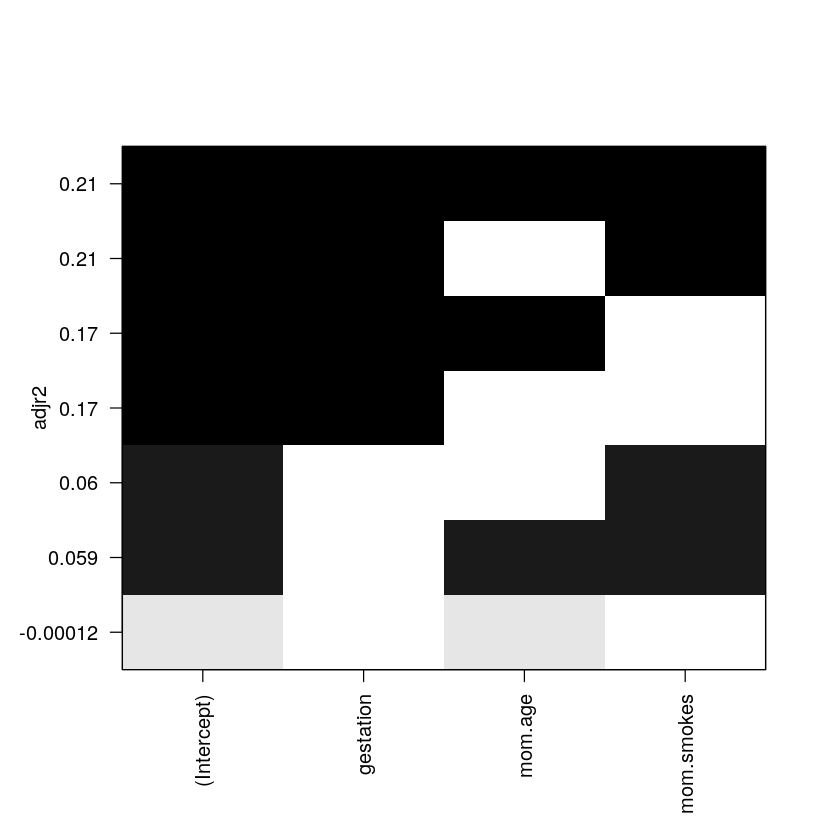

In [9]:
leaps <-regsubsets(birth.weight ~ gestation+mom.age+mom.smokes, data=babies_data, nbest=4)
plot(leaps, scale="adjr2")

Εφαρμόζουμε τη συνάρηση για την εύρεση της ευθείας της πολλαπλής παλινδρόμησης

In [10]:
input <- babies_data[,c("gestation", "mom.age", "mom.smokes")]

birth.weight <- babies_data[,c("birth.weight")]
model <- lm(birth.weight~gestation+mom.age+mom.smokes, data = input)

summary(model)

a <- coef(model)
print('Παράμετροι')
print(a)



Call:
lm(formula = birth.weight ~ gestation + mom.age + mom.smokes, 
    data = input)

Residuals:
    Min      1Q  Median      3Q     Max 
-52.084 -10.887  -0.089   9.896  52.654 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6.67813    8.76469  -0.762    0.446    
gestation    0.45336    0.02972  15.252   <2e-16 ***
mom.age      0.10454    0.08184   1.277    0.202    
mom.smokes  -8.28563    0.97568  -8.492   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 16.24 on 1170 degrees of freedom
Multiple R-squared:  0.2168,	Adjusted R-squared:  0.2147 
F-statistic: 107.9 on 3 and 1170 DF,  p-value: < 2.2e-16


[1] "Παράμετροι"
(Intercept)   gestation     mom.age  mom.smokes 
 -6.6781295   0.4533606   0.1045430  -8.2856286 


Η ευθεία που προκύπτει είναι η εξής:

birth.weight = -6.6781295 + (0.4533606 * gestation) + (0.1045430 * mom.age) -(8.2856286 * mom.smokes)

Στη συνέχεια υπολογίζουμε τους συντελεστές συσχέτισης όλων των παραγόντων. Τη μεγαλύτερη τιμή έχει ο συντελεστής του **gestation** , πράγμα το οποίο φαίνεται και στο διάγραμαμ που ακολουθεί. Επομένος το **gestation** είναι ο βασικός παράγοντας που επιδρά στο birth.weight

birth.weight,1.00000000
gestation,0.40754279
mom.age,0.02698291
mom.smokes,-0.24679951


[1] "O gestation είναι ο βασικός παράγοντας που επιδρά στο birth.weight"


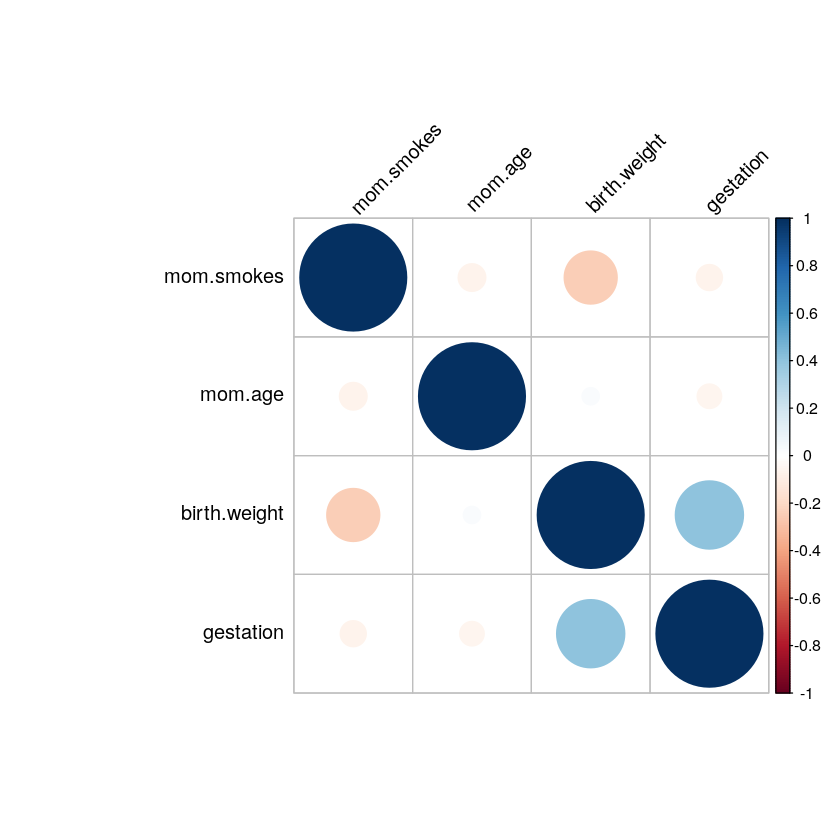

In [11]:
cor(babies_data, birth.weight)
res <-cor(babies_data)
corrplot(res, order = "hclust", 
         tl.col = "black", tl.srt = 45)
print('O gestation είναι ο βασικός παράγοντας που επιδρά στο birth.weight')